### Mixed States

In quantum mechanics, we are used to describing the state of the system in terms of vectors in Hilbert space, or kets. However, this description can only be valid in situations in which the state is definite (the so-called pure states), which is not the most general state a physical system can be in. For instance, if two physical systems are entangled, their reduced states (i.e., of each individual part alone) cannot be associated with vectors. Instead, it can be shown that they behave precisely as a statistical mixture of pure states, that is, as if the state had been prepared in one of several possible pure states randomly chosen according to some probability. 

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
#import numpy as np

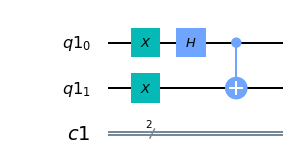

In [11]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Define Quantum circuit with 2 quantum register and 2 classical register
bell = QuantumCircuit(q,c)

# Create a Bell state
bell.x(q[0])
bell.x(q[1])
bell.h(q[0])
bell.cx(q[0], q[1])

# Draw circuit
bell.draw(output = 'mpl')

##### /00> ----> X0,X1 ------> /11> ----->H0 ------> 1/(sqrt2)(/10> - /11>)----> cx01 ----------> 1/(sqrt2) (/10> -/01>)

The state of the two qubits in the circuit is the Bell state |ψ−⟩=1/(sqrt2) (/01> -/10>), which is maximally entangled. If we were to describe the state of either of the two qubits alone, no single vector in their corresponding Hilbert spaces would faithfully characterize it. Indeed, it is easy to see that, regardless of which single-qubit unitary we apply to e.g. q0, the probability of its measurement yielding zero is 1/2, contrarily to the predictions for any pure state α|0⟩+β|1⟩.Instead, these probabilities are consistent with the situation in which one tosses a fair coin and prepares the qubit in states |0⟩ or |1⟩ depending on the outcome.

In [12]:
backend_statevector = Aer.get_backend('statevector_simulator')
job = execute(bell, backend_statevector)
result = job.result()
outputstate = result.get_statevector(bell, decimals = 3)
print(outputstate)
#plot_bloch_multivector(job.result().get_statevector(bell))

[ 0.   +0.j -0.707+0.j  0.707-0.j  0.   +0.j]


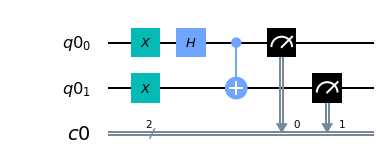

In [4]:
bell.measure(q, c)
bell.draw('mpl')

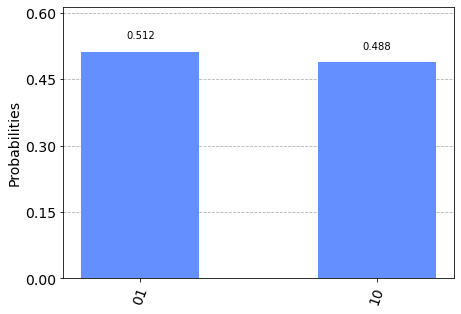

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = execute(bell, backend)
result = job.result()
result.get_counts(bell)
plot_histogram(job.result().get_counts(bell))

### Preparing Mixed States

Mixing quantum states is a basic operation, by which several different preparations are combined by switching between different preparing procedures with a classical random generator. When the outcome  x of the random generator occurs with probability  $p_x$, and if  $ρ_x$ is the state prepared upon outcome  x, then the overall state generated in this way is
ρ = $∑_x$$p_x$ $ρ_x$

This expression is called a convex combination, or mixture, and since the px have to be nonnegative and add up to one, we can write convex combinations with only two terms as ρ = p $ρ_1$ + (1 − p) $ρ_2$.

Compare the density matrix of the equal superposition $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ and the mixed state $0.5(|0\rangle\langle 0|+|1\rangle\langle 1|)$:

In [15]:
import numpy as np
zero_ket = np.array([[1], [0]])
one_ket = np.array([[0], [1]])
ψ = (zero_ket + one_ket)/np.sqrt(2)
print("Density matrix of the equal superposition")
print(ψ @ ψ.T.conj())
print("Density matrix of the equally mixed state of |0><0| and |1><1|")
print((zero_ket @ zero_ket.T.conj()+one_ket @ one_ket.T.conj())/2)

Density matrix of the equal superposition
[[0.5 0.5]
 [0.5 0.5]]
Density matrix of the equally mixed state of |0><0| and |1><1|
[[0.5 0. ]
 [0.  0.5]]


The off-diagonal elements are gone in the second case. The off-diagonal elements are also called coherences: their presence indicates that the state is quantum. The smaller these values are, the closer the quantum state is to a classical probability distribution.

The second density matrix above has only diagonal elements and they are equal: this is the equivalent way of writing a uniform distribution. We know that the uniform distribution has maximum entropy, and for this reason, a density matrix with this structure is called a maximally mixed state. 

### Open Quantum System  

An open quantum system is a quantum system interacting with its surroundings. During the last few decades, incredible technological advances have made it possible to perform experiments at the level of single atoms or photons. In these experiments, coherent manipulation of individual quantum systems allows us to prepare them in a desired quantum state with astounding precision. However, no quantum system can be considered completely isolated from its surroundings. Ultimately, all quantum systems will be subjected to coupling to what is known as their external environment. 

General Strategy: Using some qubits to playthe role of the system and other qubits for the environment and then applying the appropriate unitary gates among them to simulate the dynamics.

A very cheap way of studying the effects of decoherence is mixing a pure state with the maximally mixed state $\mathbb{1}/2^d$, where $d$ is the number of qubits, with some visibility parameter in $[0,1]$. This way we do not have to specify noise models or any other map modelling decoherence. For instance, we can mix the $|\phi^+\rangle$ state with the maximally mixed state:

In [16]:
def mixed_state(pure_state, visibility):
    #density_matrix = pure_state @ pure_state.T.conj()
    density_matrix = np.dot( pure_state, np.matrix.getH(pure_state) ) 
    maximally_mixed_state = np.eye(4)/2**2
    return visibility*density_matrix + (1-visibility)*maximally_mixed_state

ϕ = np.array([[1],[0],[0],[1]])/np.sqrt(2)
#print (array_to_latex(ϕ, pretext="$\phi$ = "))
print(f"Maximum visibility is a pure state: \n{mixed_state(ϕ, 1.0)}\n")
print(f"The state is still entangled with visibility 0.8:\n {mixed_state(ϕ, 0.8)}\n")
print(f"Entanglement is lost by 0.6:\n{mixed_state(ϕ, 0.6)}\n")
print(f"Barely any coherence remains by 0.2:\n{mixed_state(ϕ, 0.2)}\n")

Maximum visibility is a pure state: 
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]

The state is still entangled with visibility 0.8:
 [[0.45 0.   0.   0.4 ]
 [0.   0.05 0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.4  0.   0.   0.45]]

Entanglement is lost by 0.6:
[[0.4 0.  0.  0.3]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.3 0.  0.  0.4]]

Barely any coherence remains by 0.2:
[[0.3 0.  0.  0.1]
 [0.  0.2 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.1 0.  0.  0.3]]



Another way to look at what happens to a quantum state in an open system is through equilibrium processes. Think of a cup of coffee: left alone, it will equilibrate with the environment, eventually reaching the temperature of the environment. This includes energy exchange. A quantum state does the same thing and the environment has a defined temperature, just like the environment of a cup of coffee.

The equilibrium state is called the thermal state. It has a very specific structure and we will revisit it, but for now, suffice to say that the energy of the samples pulled out of a thermal state follows a Boltzmann distribution. The Boltzmann -- also called Gibbs -- distribution is described as $P(E_i) = \frac {e^{-E_{i}/T}}{\sum _{j=1}^{M}{e^{-E_{j}/T}}}$, where $E_i$ is an energy, and $M$ is the total number of possible energy levels. Temperature enters the definition: the higher the temperature, the closer we are to the uniform distribution. In the infinite temperature limit, it recovers the uniform distribution. At high temperatures, all energy levels have an equal probability. In contrast, at zero temperature, the entire probability mass is concentrated on the lowest energy level, the ground state energy. To get a sense of this, let's plot the Boltzmann distribution with vastly different temperatures:

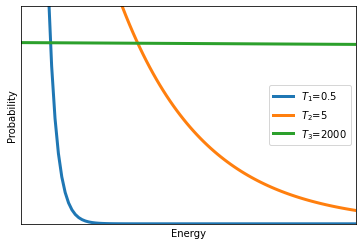

In [17]:
import matplotlib.pyplot as plt

temperatures = [.5, 5, 2000]
energies = np.linspace(0, 20, 100)
fig, ax = plt.subplots()
for i, T in enumerate(temperatures):
    probabilities = np.exp(-energies/T)
    Z = probabilities.sum()
    probabilities /= Z
    ax.plot(energies, probabilities, linewidth=3, label = "$T_" + str(i+1)+"$="+str(T))
ax.set_xlim(0, 20)
ax.set_ylim(0, 1.2*probabilities.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Energy')
ax.set_ylabel('Probability')
ax.legend()

Here $T_1$ <$T_2$<$T_3$. Notice that $T_1$ is a low temperature, and therefore it is highly peaked at low energy levels. In contrast, $T_3$ is a very high temperature and the probability distribution is almost completely flat.

### Quantum Error Correction Using Repitition code (Cont.. from Tuesday's class) 

#### Storing Qubits

We dealt with the case where there is no delay between encoding and decoding. That means we receive the final measurement immediately after initializing the circuit.

However in many cases there will be significant delay. In such cases we need to store quantum states and preserve their integrity during the computation. Errors do not occur only when something happens, they may also occur when qubits are idle. The qubits interact with each other and their environment results in noise. The longer quibts are left in idle condition, the greater the effects of this noise becomes. 

The solution is to keep measuring throughout. No qubit is left idle for too long. Instead, information is constantly being extracted from the system to keep track of the errors that have occurred.This is not ideal. If we wanted to do some computation on our logical qubit, or if we wish to perform a basis change before final measurement, we need to preserve the superposition. Destroying it is an error. But this is not an error caused by imperfections in our devices. It is an error that we have introduced as part of our attempts to correct errors. And since we cannot hope to recreate any arbitrary superposition stored in our quantum computer, it is an error that cannot be corrected.

For this reason, we must find another way of keeping track of the errors that occur when our logical qubit is stored for long times. This should give us the information we need to detect and correct errors, and to decode the final measurement result with high probability. However, it should not cause uncorrectable errors to occur during the process by collapsing superpositions that we need to preserve.

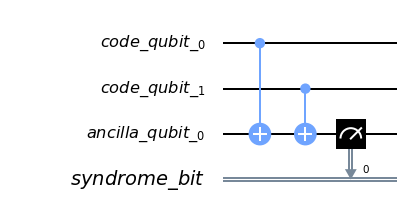

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

cq = QuantumRegister(2,'code\_qubit\_') 
lq = QuantumRegister(1,'ancilla\_qubit\_') 
sb = ClassicalRegister(1,'syndrome\_bit')  
qc = QuantumCircuit(cq,lq,sb)
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.measure(lq,sb)
qc.draw('mpl')

Two are called 'code qubits', and the other is called an 'ancilla qubit'. One bit of output is extracted, called the syndrome bit. The ancilla qubit is always initialized in state  |0⟩ . The code qubits, however, can be initialized in different states.

To see what affect different inputs have on the output, we can create a circuit qc_init that prepares the code qubits in some state, and then run the circuit qc_init+qc.

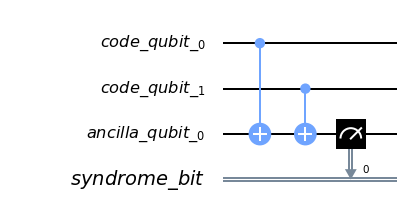

In [3]:
qc_init = QuantumCircuit(cq)

(qc_init+qc).draw('mpl')

For first case, code cubits are /00>

/000> ------> cx00 ------> /000> cx10 ------> /000> 

In [4]:
counts = execute( qc_init+qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


Now lets try /11>

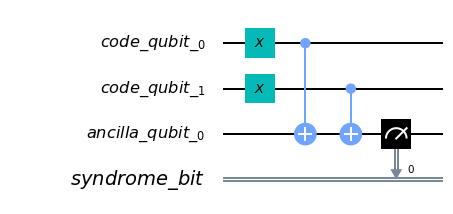

In [5]:
qc_init = QuantumCircuit(cq)
qc_init.x(cq)

(qc_init+qc).draw('mpl')

/011> ------> cx00 ------> /111> ------> cx10 ------> /011>

In [6]:
counts = execute(qc_init+qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


Now let's try the superposition of /00> & /11>

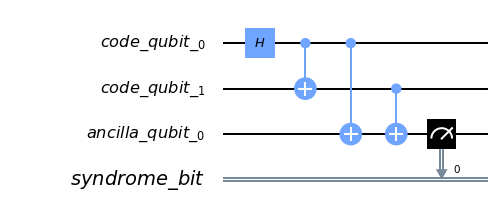

In [7]:
qc_init = QuantumCircuit(cq)
qc_init.h(cq[0])
qc_init.cx(cq[0],cq[1])

(qc_init+qc).draw('mpl')

/000> -------> H0 ----> (1/sqrt2)(/000> + /001>) -----> Cx01 ------> (1/sqrt2)(/000> + /011>) -----> Cx00 -----> (1/sqrt2)(/000> + /111>) -----> Cx10 ----> (1/sqrt2)(/000> + /011>) 

In [8]:
counts = execute(qc_init+qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


The opposite outcome will be found for an initial state of  |01⟩ ,  |10⟩  or any superposition thereof.

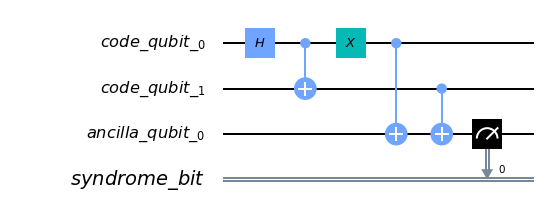

In [9]:
qc_init = QuantumCircuit(cq)
qc_init.h(cq[0])
qc_init.cx(cq[0],cq[1])
qc_init.x(cq[0])

(qc_init+qc).draw('mpl')

In [10]:
counts = execute(qc_init+qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:',counts)

Results: {'1': 1024}


In such cases the output is always '1'.

This process of error correction looks at the two code qubits and determines whether their state is the same or different in the z basis. For basis states that are the same in the z basis, like |00⟩ and |11⟩, the measurement simply returns 0. It also does so for any superposition of these. Since it does not distinguish between these states in any way, it also does not collapse such a superposition.

Similarly, For basis states that are different in the z basis it returns a 1. This occurs for |01⟩, |10⟩ or any superposition thereof.

Now suppose we apply such a 'syndrome measurement' on all pairs of physical qubits in our repetition code. If their state is described by a repeated |0⟩, a repeated |1⟩, or any superposition thereof, all the syndrome measurements will return 0. Given this result, we will know that our states are indeed encoded in the repeated states that we want them to be, and can deduce that no errors have occurred. If some syndrome measurements return 1, however, it is a signature of an error. We can therefore use these measurement results to determine how to decode the result.





Resources:

    https://matteoacrossi.github.io/oqs-jupyterbook/introduction.html
    https://qiskit.org/textbook/ch-quantum-hardware/error-correction-repetition-code.html